<a href="https://colab.research.google.com/github/daothong38/ML_Lab/blob/main/Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
X = np.array([180, 162, 183, 174, 160, 163, 180, 165, 175, 170, 170, 169,
 168, 175, 169, 171, 155, 158, 175, 165]).reshape(-1,1)

y = np.array([86, 55, 86.5, 70, 62, 54, 60, 72, 93, 89, 60, 82, 59, 75,
 56, 89, 45, 60, 60, 72]).reshape((-1,1))

X = np.insert(X, 0, 1, axis=1)


[-114.75365641]
[1.08667645]


Text(0.5, 1.0, 'Chiều cao và cân nặng của sinh viên VLU')

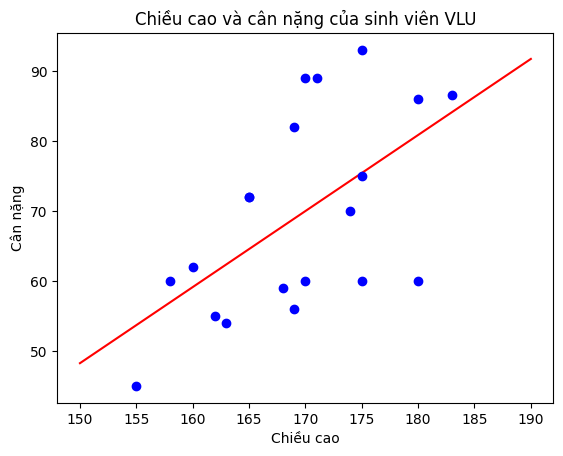

In [ ]:
import matplotlib.pyplot as plt
theta = np.linalg.inv(X.T @ X) @ X.T @ y
print(theta[0])
print(theta[1])

x1 = 150
y1 = theta[0] + theta[1] * x1
x2 = 190
y2 = theta[0] + theta[1] * x2
plt.plot([x1, x2], [y1, y2], 'r-')
plt.plot(X[:,1], y[:,0], 'bo')
plt.xlabel('Chiều cao')
plt.ylabel('Cân nặng')
plt.title('Chiều cao và cân nặng của sinh viên VLU')

Load thư viện

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from abc import abstractmethod

# 1: Implement lại thuật toán Linear Regression

In [ ]:
class LinearRegression:
    def __init__(self, X, y, N):
        self._X = X
        self._y = y
        self._n = N

    @property
    def x(self):
        print("This is the independent variable X:")
        return self._X

    @property
    def y(self):
        print("This is the dependent variable y:")
        return self._y

    @property
    def n(self):
        print("This is the length of the data N:")
        return self._n

    @property
    def w(self):
        return self._w

    def fit(self):
        self.new_x = np.hstack((np.ones((self._n, 1)), self._X))
        self._w = np.dot(np.linalg.inv(np.dot(self.new_x.T, self.new_x)), np.dot(self.new_x.T, self._y))

    def predict(self):
        return np.dot(self.new_x, self._w).reshape(1, -1)[0]


# 2a: Fit dữ liệu trong file linear.csv và visualize

Text(0, 0.5, 'y')

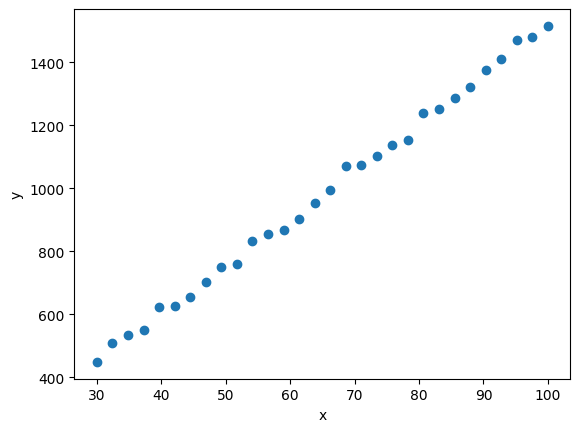

In [ ]:
data = pd.read_csv('linear.csv').values
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
N = data.shape[0]
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
reg = LinearRegression(x, y, N)
reg.fit()
predict = reg.predict()

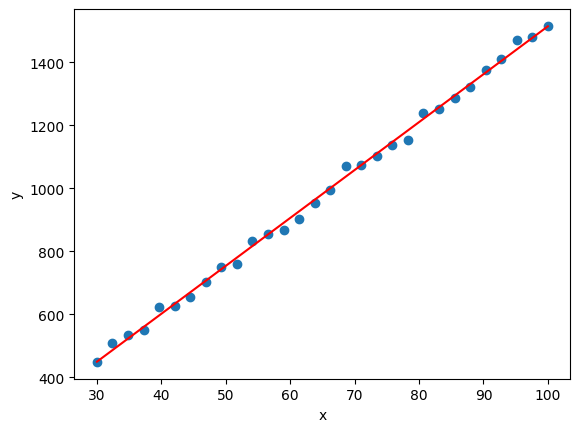

In [ ]:
plt.plot(x, predict, 'r')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 2b: Tính loss Root Mean Squared Error - RMSE

In [ ]:
w = reg.w
del reg
w

array([[-7.06426865],
       [15.2110908 ]])

In [ ]:
diff =  x * w[1] + w[0]
error = diff - y
# using this vectorize calculation will be much faster than using loop
squared_error = np.power(error, 2)
mean_squared_error = np.sum(squared_error)/N
root_mean_squared_error = np.sqrt(mean_squared_error)
root_mean_squared_error

15.704135712961893

# 3: Fit dữ liệu trong file nonLinear.csv

Text(0, 0.5, 'y')

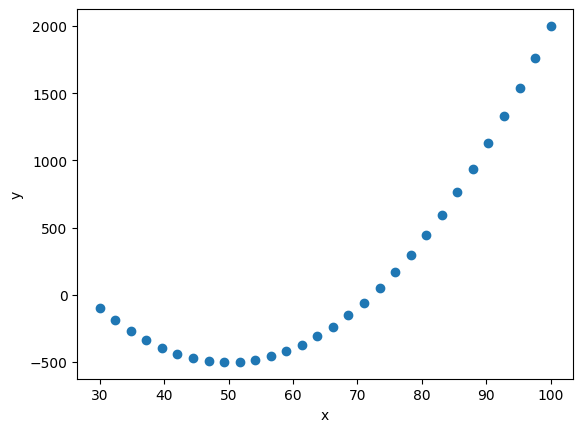

In [ ]:
data = pd.read_csv('nonLinear.csv').values
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
N = data.shape[0]
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
reg = LinearRegression(x, y, N)
reg.fit()
predict = reg.predict()

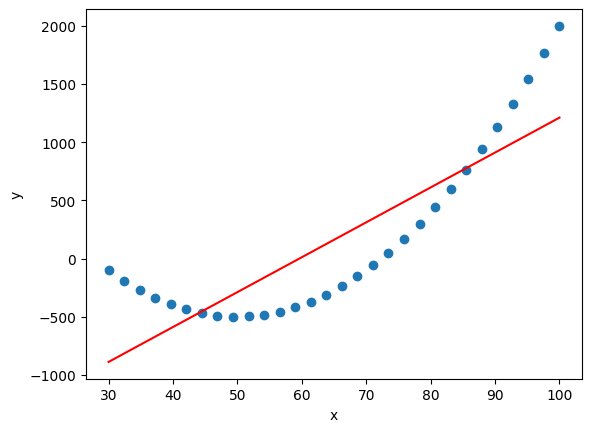

In [ ]:
plt.plot(x, predict, 'r')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 3b: Visualize kết quả

In [ ]:
w = reg.w
del reg
diff =  x * w[1] + w[0]
error = diff - y
# using this vectorize calculation will be much faster than using loop
squared_error = np.power(error, 2)
mean_squared_error = np.sum(squared_error)/N
root_mean_squared_error = np.sqrt(mean_squared_error)
root_mean_squared_error

389.7607572679822

# 3c: Nhận xét

Như các bạn có thấy, đối với dữ liệu là đường cong parabol như trên, thuật toán Linear Regression sẽ không hoạt động tốt với dữ liệu đầu vào. Nói cách khác, dữ liệu đầu vào chưa đủ phức tạp để mô hình có thẻ dự đoán tốt. Một cách hay để xử lý vấn đề này là làm dữ liệu đầu vào phức tạp hơn.

# 4: Cải thiện model

Một cách để làm dữ liệu phức tạp hơn, đó là thêm vào bộ dữ liệu huấn luyện các dữ liệu ở bậc cao hơn


In [ ]:
data = pd.read_csv('nonLinear.csv').values
x = data[:, 0].reshape(-1, 1)
# Thêm vào dữ liệu huấn luyện x^2 để tăng độ phức tạp của dữ liệu
new_x = np.hstack((x.copy(), x**2))

y = data[:, 1].reshape(-1, 1)
N = data.shape[0]


In [ ]:
reg = LinearRegression(new_x, y, N)
reg.fit()
predict = reg.predict()

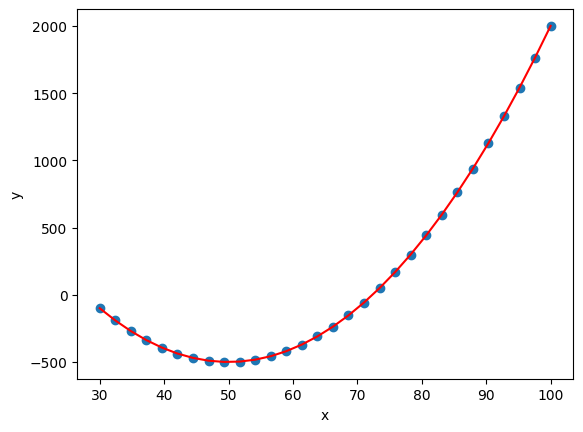

In [ ]:
plt.plot(x, predict, 'r')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Như các bạn đã thấy, khi thêm vào tập dữ liệu huấn luyện x^2 thì mô hình đã đưa ra được dự đoán chuẩn xác hơn rất nhiều. Chúng ta tiếp tục tính RMSE loss.

In [ ]:
error = predict - y.reshape(1,-1)[0]
# using this vectorize calculation will be much faster than using loop\
squared_error = np.power(error, 2)
mean_squared_error = np.sum(squared_error)/len(y)
root_mean_squared_error = np.sqrt(mean_squared_error)
root_mean_squared_error

0.0016144652375771967

Như các bạn đã thấy, dựa vào loss, ta có thể kết luận rằng model với độ phức tạp lớn hơn có khả năng tốt hơn trong việc dự đoán đầu ra cho các dữ liệu mới.

# 5 :Thử nghiệm với dữ liệu sample.csv

In [ ]:
def rmse_loss(y, pred):
    error = pred - y
    squared_error = np.power(error, 2)
    mean_squared_error = np.sum(squared_error)/len(y)
    root_mean_squared_error = np.sqrt(mean_squared_error)
    return root_mean_squared_error

In [ ]:
df = pd.read_csv('sample.csv')

X = df.drop("Kg", axis = 1)
y = df[['Kg']]
y

,Kg
0,52.163126
1,61.801964
2,93.440034
3,59.874197
4,50.348756
...,...
87,43.544870
88,45.359240
89,43.998463
90,34.019430


Thử nghiệm với tất cả các biến:

In [ ]:
reg = LinearRegression(X[["pound", "Femoral Neck","Activity","%Fat S"]].values, y, len(y["Kg"].values))
reg.fit()
predict = reg.predict()

del reg

Text(0, 0.5, 'y')

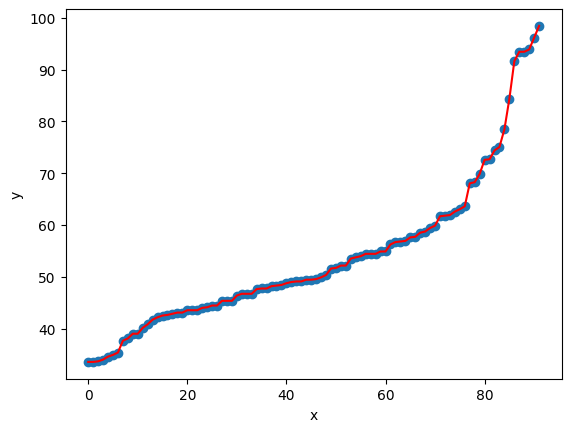

In [ ]:
sorted_predict = np.sort(predict, axis=0)
sorted_y = np.sort(y["Kg"].values)
plt.scatter([i for i in range(len(y))], sorted_predict)
plt.plot([i for i in range(len(y))], sorted_y, 'r')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
print("The loss is:",rmse_loss(sorted_predict, np.sort(y["Kg"].values, axis=0)))

The loss is: 4.158608677629948e-13


Các bạn có thể thấy loss ở đây là rất nhỏ, hay nói đúng là bằng 0, khi kết quả là 1 con số x $10^{-12}$, nghĩa là nó có đến hơn 10 số 0 sau dấu thập phân

Loại bỏ biến pound

In [ ]:
reg = LinearRegression(X[["Femoral Neck","Activity","%Fat S"]].values, y, len(y["Kg"].values))
reg.fit()
predict = reg.predict()

del reg

Text(0, 0.5, 'y')

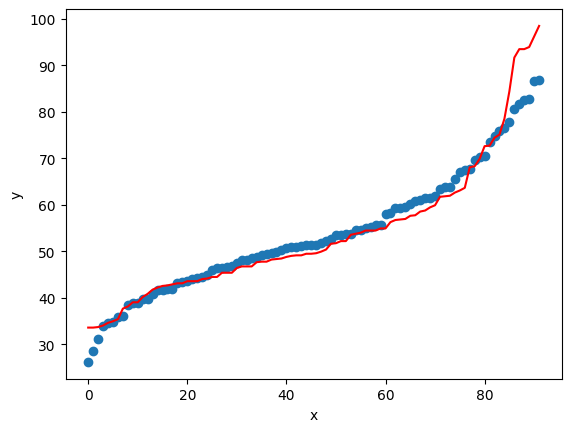

In [ ]:
sorted_predict = np.sort(predict, axis=0)
sorted_y = np.sort(y["Kg"].values)
plt.scatter([i for i in range(len(y))], sorted_predict)
plt.plot([i for i in range(len(y))], sorted_y, 'r')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
print("The loss is:",rmse_loss(sorted_predict, np.sort(y["Kg"].values, axis=0)))

The loss is: 3.431533115006637


Có thể thấy sau khi bỏ biến pound, mô hình đã bớt chuẩn đi khá nhiều, với rmse loss lên tới 3.43, một con số không quá lớn.

Tiếp tục, chúng ta hãy bỏ đi biến "Femoral Neck".

In [ ]:
reg = LinearRegression(X[["Activity","%Fat S"]].values, y, len(y["Kg"].values))
reg.fit()
predict = reg.predict()

del reg

Text(0, 0.5, 'y')

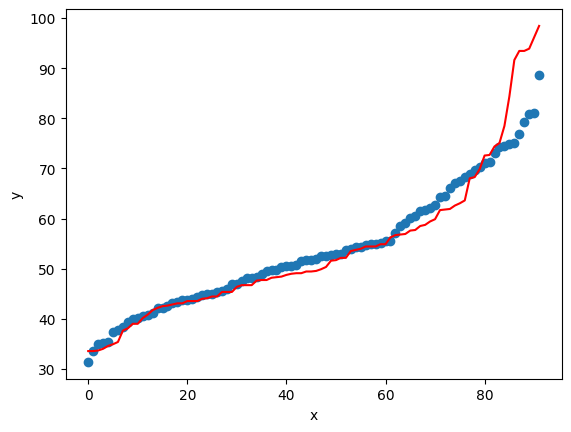

In [ ]:
sorted_predict = np.sort(predict, axis=0)
sorted_y = np.sort(y["Kg"].values)
plt.scatter([i for i in range(len(y))], sorted_predict)
plt.plot([i for i in range(len(y))], sorted_y, 'r')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
print("The loss is:",rmse_loss(sorted_predict, np.sort(y["Kg"].values, axis=0)))

The loss is: 4.17577289074543


Sau khi bỏ đi Femoral Neck, loss không tăng lên quá nhiều, với mức tăng khoảng 0.7.

Hãy loại bỏ tiếp biến Activity.

In [ ]:
reg = LinearRegression(X[["%Fat S"]].values, y, len(y["Kg"].values))
reg.fit()
predict = reg.predict()

del reg

Text(0, 0.5, 'y')

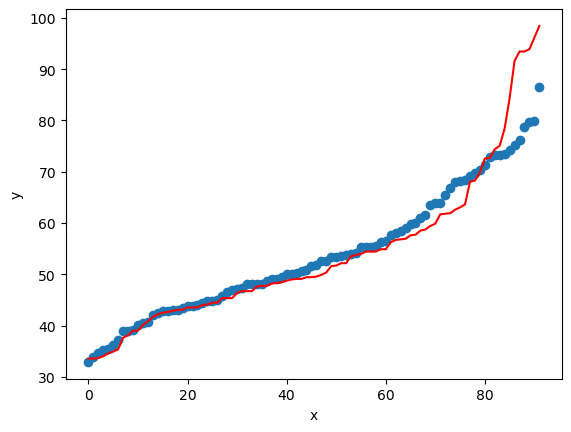

In [ ]:
sorted_predict = np.sort(predict, axis=0)
sorted_y = np.sort(y["Kg"].values)
plt.scatter([i for i in range(len(y))], sorted_predict)
plt.plot([i for i in range(len(y))], sorted_y, 'r')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
print("The loss is:",rmse_loss(sorted_predict, np.sort(y["Kg"].values, axis=0)))

The loss is: 4.416570177385077


Thêm một thí nghiệm nhỏ, hãy chỉ dùng biến pound và dự đoán khối lượng của người dùng

In [ ]:
reg = LinearRegression(X[["pound"]].values, y, len(y["Kg"].values))
reg.fit()
predict = reg.predict()

del reg

Text(0, 0.5, 'y')

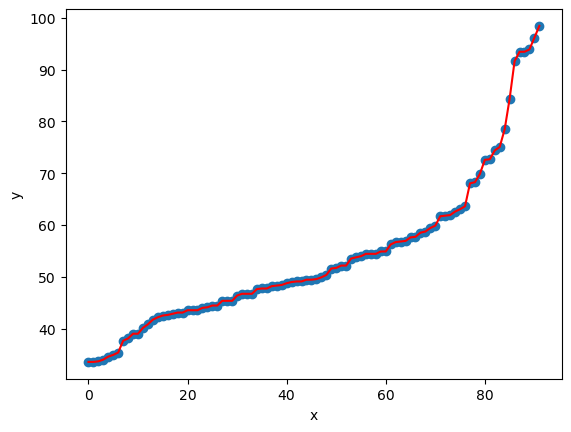

In [ ]:
sorted_predict = np.sort(predict, axis=0)
sorted_y = np.sort(y["Kg"].values)
plt.scatter([i for i in range(len(y))], sorted_predict)
plt.plot([i for i in range(len(y))], sorted_y, 'r')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
print("The loss is:",rmse_loss(sorted_predict, np.sort(y["Kg"].values, axis=0)))

The loss is: 1.5273794765938261e-13


Khi chỉ dùng duy nhất biến pound, mô hình đã tái hiện lại việc dùng 4 biến khi chúng ta thử nghiệm, sự việc thú vị này xảy ra là vì biến độc lập pound, và biến phụ thuộc Kg có mối tương quan là 1, chính vì vậy việc sủ dụng pound không có ý nghĩa gì khi đi dự đoán biến Kg, việc sử dụng biến pound này, cũng không khác gì đi dự đoán chiều cao của một người sau khi vừa lấy thước đo cả! =), đây chính là hậu quả của việc không để ý đến đa cộng tuyến khi xây dựng những mô hình tuyến tính!